# Thresholding Diagram

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
from matplotlib.colors import ListedColormap, BoundaryNorm
def radar_colormap():
    r"""Returns an NWS colormap.
    
    Parameters
    ----------
        
    Returns
    -------
    cmap: ListedColormap
        NWS-like radar colormap.
    """ 
 
    nws_reflectivity_colors = ["#ffffff",  # 0
                               "#04e9e7",  # 5
                               "#019ff4",  # 10
                               "#0300f4",  # 15
                               "#02fd02",  # 20
                               "#01c501",  # 25
                               "#008e00",  # 30
                               "#fdf802",  # 35
                               "#e5bc00",  # 40
                               "#fd9500",  # 45
                               "#fd0000",  # 50
                               "#d40000",  # 55
                               "#bc0000",  # 60
                               "#f800fd",  # 65
                               "#9854c6",  # 70
                               "#4B0082",  # 75
                               "#000000"]
                                
    cmap = ListedColormap(nws_reflectivity_colors)
    
    return cmap

In [3]:
def radar_norm():
    r"""Return a colormap and normalization that allow you to represent
    radar data with colors every 5 dBZ that mimics the official NWS
    radar images.
    
    Parameters
    ----------
        
    Returns
    -------
    cmap: ListedColormap
        NWS-like radar colormap.
    norm: BoundaryNorm
        Normalization for 5 dBZ levels (0-80).
    """ 

    cmap = radar_colormap()
    classes = np.array(list(range(0, 85, 5)))
    norm = BoundaryNorm(classes, ncolors=cmap.N)    
    
    return cmap, norm

cmap, norm = radar_norm()

### Open and Subset the Data

In [4]:
#open datasets to create example plots
ds_ref = xr.open_mfdataset('/home/scratch/WRF_BCC/reflectivity/REFD/historical/1991-1992/REFD_historical-1991-1992_1992-06-*.nc')
ds_uvv = xr.open_mfdataset('/home/scratch/WRF_BCC/severe_weather/W_UP_MAX/historical/1991-1992/1992-06-*.nc')
ds_uh = xr.open_mfdataset('/home/scratch/WRF_BCC/severe_weather/UP_HELI_MAX/historical/1991-1992/UP_HELI_MAX_historical-1991-1992_1992-06-*.nc')

In [5]:
#find maximum reflectivity value
location = np.where(ds_ref.REFD.values==np.max(ds_ref.REFD.values))

In [6]:
#Create subsets of the reflectivity, updraft helicity, and upward vertical velocites. 
refc_data = ds_ref.REFD.sel(Time=ds_ref.Time.values[location[0][0]], south_north=slice(location[1][0]-12,location[1][0]+12),
                        west_east=slice(location[2][0]-12,location[2][0]+12)).values

uvv_data = ds_uvv.W_UP_MAX.sel(Time=ds_ref.Time.values[location[0][0]], south_north=slice(location[1][0]-12,location[1][0]+12),
                             west_east=slice(location[2][0]-12,location[2][0]+12)).values

uh_data = ds_uh.UP_HELI_MAX.sel(Time=ds_ref.Time.values[location[0][0]], south_north=slice(location[1][0]-12,location[1][0]+12),
                             west_east=slice(location[2][0]-12,location[2][0]+12)).values

### Create Raw Data Plots for DBZ and UH

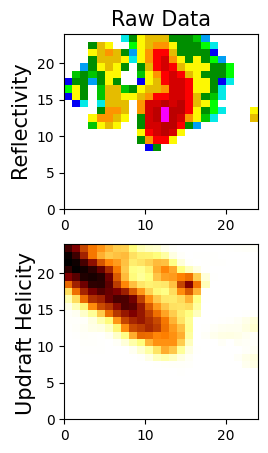

In [57]:
#Create a subplot
plt.figure(figsize=(2.5,5))

#iterate through the subplot
for i in range(2):
    ax = plt.subplot(2,1,i+1)
    
    #reflectivity plot
    if i == 0:
        plt.pcolormesh(refc_data, cmap=cmap, norm=norm)
        ax.annotate('Reflectivity', xy=(-0.28,0.2), xycoords='axes fraction', fontsize=15, rotation='vertical')
        ax.set_title('Raw Data',fontsize=15)
    
    #updraft helicity plot
    elif i == 1:
        plt.pcolormesh(uh_data, cmap='afmhot_r')
        ax.annotate('Updraft Helicity', xy=(-0.25,0.05), xycoords='axes fraction', fontsize=15, rotation='vertical')


### Create Binary Plots for DBZ and UH

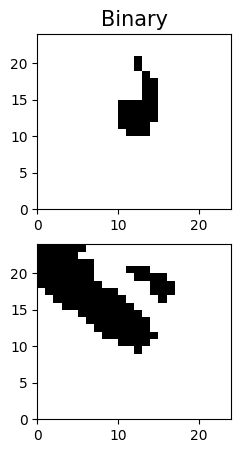

In [58]:
#Create a subplot
plt.figure(figsize=(2.5,5))

#iterate through the subplot
for i in range(2):
    ax = plt.subplot(2,1,i+1)
    
    #reflectivity threshold plot
    if i == 0:
        plt.pcolormesh(np.where(refc_data >= 55, 1, 0), cmap='binary')
        ax.set_title('Binary',fontsize=15)
        
    #updraft helicity threshold plot
    elif i == 1:
        plt.pcolormesh(np.where(uh_data>= 70, 1, 0), cmap='binary')

### Synthetic Severe Plot for DBZ and UH

Text(0.5, 1.0, 'Synthetic Severe')

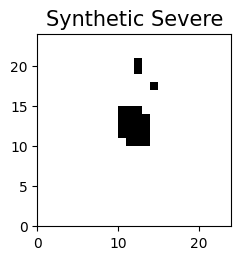

In [62]:
#Create a plot
plt.figure(figsize=(2.5,2.5))

#binary for DBZ and UH
plt.pcolormesh(np.where(refc_data >= 55, 1, 0) * np.where(uh_data>= 70, 1, 0), cmap='binary')
plt.title('Synthetic Severe',fontsize=15)

### Create Raw Data Plots for DBZ and UVV

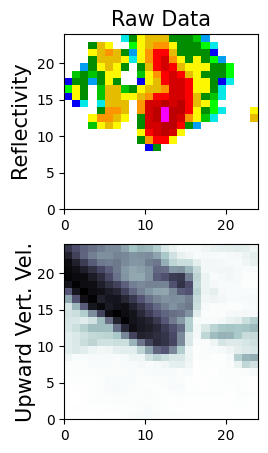

In [63]:
#Create a subplot
plt.figure(figsize=(2.5,5))

#iterate through the subplot
for i in range(2):
    ax = plt.subplot(2,1,i+1)
    
    #reflectivity plot
    if i == 0:
        plt.pcolormesh(refc_data, cmap=cmap, norm=norm)
        ax.annotate('Reflectivity', xy=(-0.28,0.2), xycoords='axes fraction', fontsize=15, rotation='vertical')
        ax.set_title('Raw Data',fontsize=15)        
    #upward vertical velocity   
    elif i == 1:
        plt.pcolormesh(uvv_data, cmap='bone_r')
        ax.annotate('Upward Vert. Vel.', xy=(-0.25,0.01), xycoords='axes fraction', fontsize=15, rotation='vertical')

### Create Binary Plots for DBZ and UVV

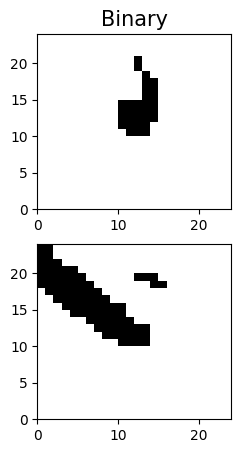

In [64]:
#Create a subplot
plt.figure(figsize=(2.5,5))

#iterate through the subplot
for i in range(2):
    ax = plt.subplot(2,1,i+1)
    
    #reflectivity threshold plot
    if i == 0:
        plt.pcolormesh(np.where(refc_data >= 55, 1, 0), cmap='binary')
        ax.set_title('Binary',fontsize=15)
        
    #upward vertical velocity threshold plot   
    elif i == 1:
        plt.pcolormesh(np.where(uvv_data>= 21, 1, 0), cmap='bone_r')

### Synthetic Severe Plot for DBZ and UVV

Text(0.5, 1.0, 'Synthetic Severe')

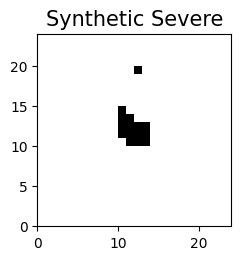

In [66]:
#Create a plot
plt.figure(figsize=(2.5,2.5))

#binary for DBZ and UH
plt.pcolormesh(np.where(refc_data >= 55, 1, 0) * np.where(uvv_data>= 21, 1, 0), cmap='binary')
plt.title('Synthetic Severe',fontsize=15)